In [1]:
import pandas as pd
import numpy as np

In [2]:
#DB titanic ... import
titanic = pd.read_csv("Datasets/titanic.csv")
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
778,0,3,male,NaN,0,0,7.7375,Q,Third,man,True,NaN,Queenstown,no,True
414,1,3,male,44.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,yes,True
347,1,3,female,NaN,1,0,16.1000,S,Third,woman,False,NaN,Southampton,yes,False
345,1,2,female,24.0,0,0,13.0000,S,Second,woman,False,F,Southampton,yes,True
517,0,3,male,NaN,0,0,24.1500,Q,Third,man,True,NaN,Queenstown,no,True


In [3]:
#Riusciamo a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna Cabin)?
ponti = titanic["deck"].dropna().unique()
cont=0
for ponte in ponti:
    if len(ponte) == 1:
        cont += 1

print(cont)


titanic["deck"].value_counts()

7


deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

<Axes: xlabel='pclass', ylabel='count'>

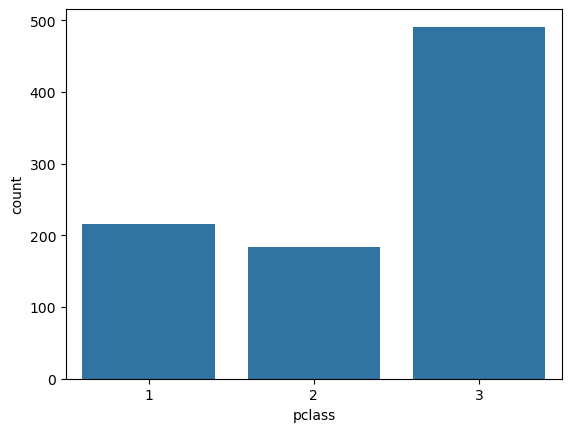

In [4]:
#Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna PClass)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='pclass' ,data=titanic)

<Axes: xlabel='survived', ylabel='count'>

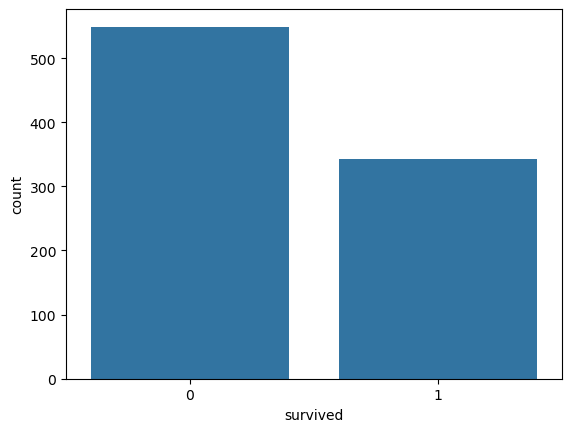

In [5]:
#Fare la stessa cosa per la colonna Survived

sns.countplot(x='survived', data=titanic)

<Axes: xlabel='fare', ylabel='Count'>

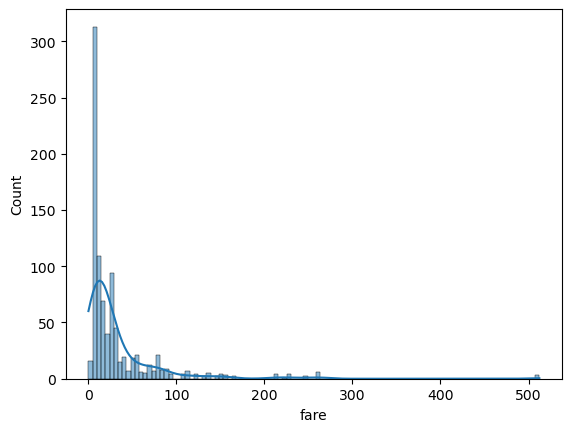

In [6]:
#Qual era la distribuzione delle tariffe (Fare)?

sns.histplot(titanic['fare'], kde=True)

<Axes: xlabel='pclass', ylabel='age'>

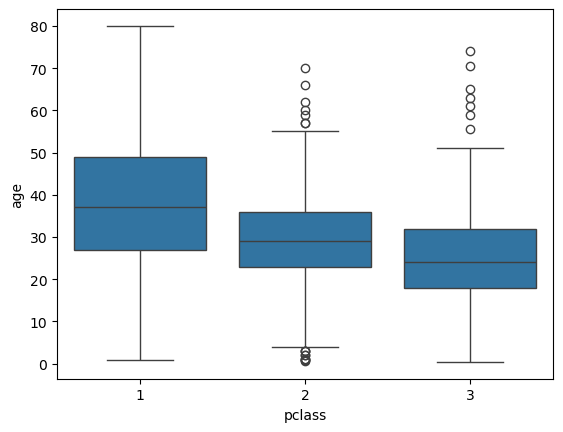

In [7]:
#Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un boxplot?

sns.boxplot(x='pclass', y='age', data=titanic)

#Visualizziamo un boxplot rispetto alle colonne Fare e Survived; che cose ne deduciamo?
La maggior parte dei sopravvissuti avevano pagato le tariffe piu alte (prima classe) ma pagare la prima classe non ha garantito la salvezza.

In [8]:
#dataset stockdata

stockdata = pd.read_csv("Datasets/stockdata.csv")
stockdata.sample(5)

,MSFT,IBM,SBUX,AAPL,GSPC,Date
1157,22.492721,154.875171,17.183142,49.429355,1199.380005,2011-08-05
2063,40.456026,151.630949,46.444326,122.675917,2081.189941,2015-03-16
1738,35.138750,165.937901,39.510995,72.983160,1802.750000,2013-11-26
122,24.087382,88.309793,12.117976,15.949903,1505.709961,2007-06-28
34,23.655457,81.781847,15.123417,11.842036,1456.380005,2007-02-22


<Axes: xlabel='Date'>

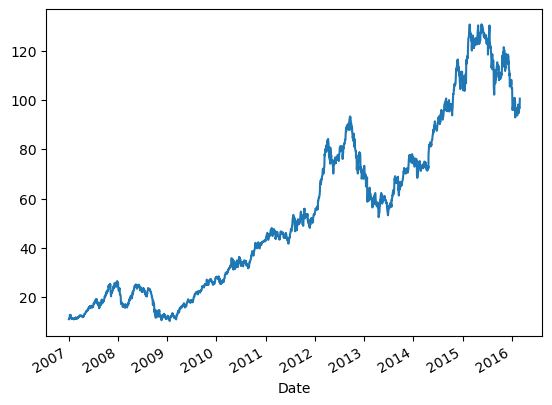

In [9]:
#Visualizziamo l'andamento delle azioni della Apple ("AAPL")
stockdata["Date"] = pd.to_datetime(stockdata["Date"])
stockdata.groupby("Date")["AAPL"].sum().plot()

<Axes: xlabel='Date'>

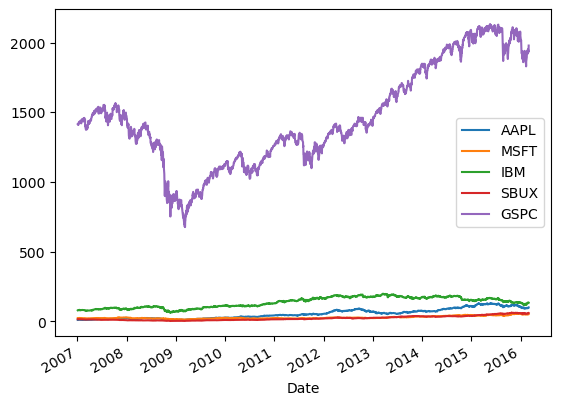

In [10]:
#Visualizziamo l'andamento di tutte le azioni del dataset

stockdata.groupby("Date")[["AAPL","MSFT","IBM","SBUX","GSPC"]].sum().plot()

<Axes: xlabel='Date'>

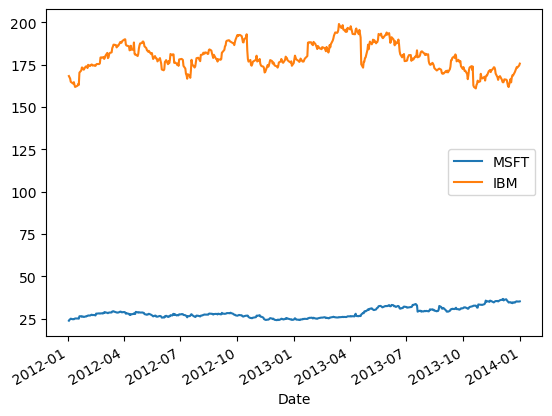

In [11]:
#Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
stockdata["Year"] = stockdata["Date"].dt.year
anni = stockdata[(stockdata["Year"] >= 2012) & (stockdata["Year"] <= 2013)]
anni.set_index("Date")[["MSFT", "IBM"]].plot()

(array([ 11.,  34.,  76.,  31.,  47., 136., 289., 348., 277., 170., 124.,
         72.,  47.,  48.,  33.,  51.,  23.,  46.,  41.,  46.,  55.,  58.,
         86.,  64.,   5.,   8.,  13.,  26.,  23.,  18.]),
 array([12.630211 , 14.0807663, 15.5313216, 16.9818769, 18.4324322,
        19.8829875, 21.3335428, 22.7840981, 24.2346534, 25.6852087,
        27.135764 , 28.5863193, 30.0368746, 31.4874299, 32.9379852,
        34.3885405, 35.8390958, 37.2896511, 38.7402064, 40.1907617,
        41.641317 , 43.0918723, 44.5424276, 45.9929829, 47.4435382,
        48.8940935, 50.3446488, 51.7952041, 53.2457594, 54.6963147,
        56.14687  ]),
 <BarContainer object of 30 artists>)

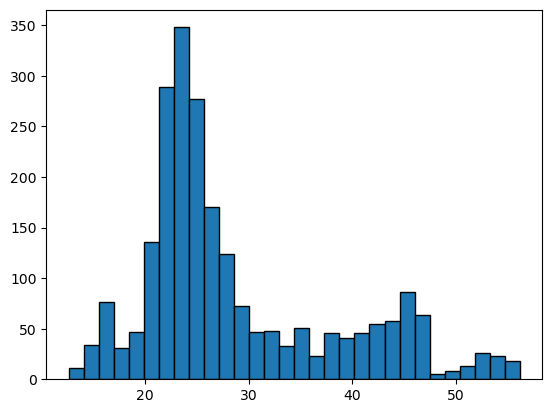

In [12]:
#Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso
import matplotlib.pyplot as plt
plt.hist(stockdata["MSFT"], edgecolor='black',bins=30)

In [13]:
metal = pd.read_csv("metal_bands_2017.csv", encoding='latin1',index_col = 0)
metal.sample(5)
#Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?

,band_name,fans,formed,origin,split,style
3757,The Scourger,4,2003,Finland,2003,Thrash
1492,Nox Aurea,32,2005,Sweden,-,"Melodic death,Doom"
4189,Cryptal Darkness,2,1993,Australia,1993,"Gothic doom,Death doom"
3449,Myraeth,5,2009,Australia,2009,"Death doom,Gothic"
674,Hail Of Bullets,103,2006,The Netherlands,-,Death


<Axes: ylabel='Frequency'>

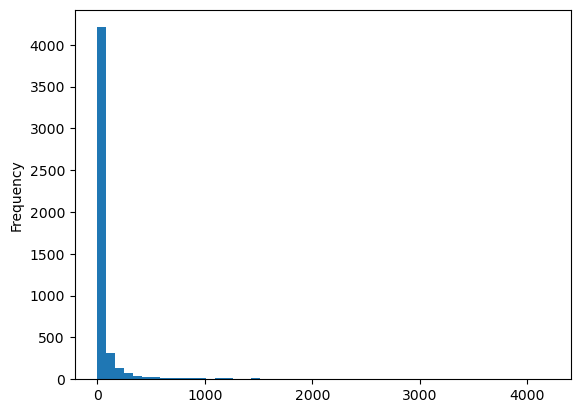

In [14]:
metal["fans"].plot(kind="hist",bins=50)

Si puo vedere che poche band hanno un numero alto di fans, la maggior parte ha pochissimi fans

Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri
quanti fan ci sono in totale rispetto al paese di origine (nota: in questo caso specifico,
per accedere alla colonna "style" dovremo usare .loc[:, "style"] e non .style perché quest'ultimo è un metodo)

<Axes: ylabel='origin'>

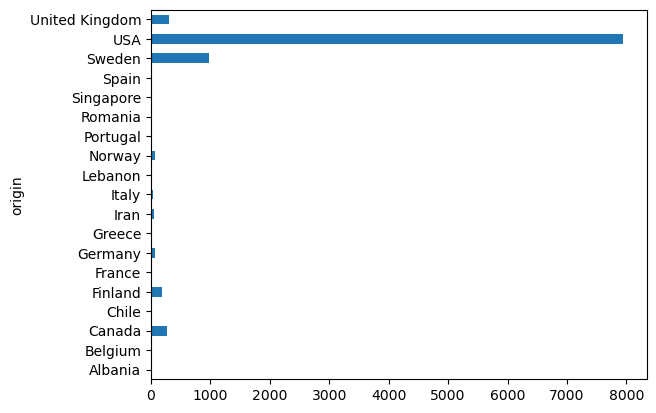

In [15]:
metal["style"] = metal["style"].str.lower()
f1 = metal["style"].str.contains("progressive")
f2 = metal["style"].str.contains("thrash")
filtro = f1&f2

metal_pt = metal.loc[filtro]
metal_pt.groupby("origin")["fans"].sum().plot(kind="barh")

Ho usato .sum() non size perche nella traccia chiede quanti fan ci sono in totale rispetto al paese di origin
Cosi si vede subito che negli USA c'e la maggior concentrazione di fan per band tipo progressive e thrash, che arrivano fino a 8000 fans mentre gli altri paese non superano i 1000 fans.

Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [16]:
filtro = metal["formed"] != "-"
metal_f = metal.loc[filtro]
metal_f["formed"] = metal_f["formed"].astype(int)

C:\Users\iorio\AppData\Local\Temp\ipykernel_13172\1956073452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal_f["formed"] = metal_f["formed"].astype(int)


<Axes: ylabel='Frequency'>

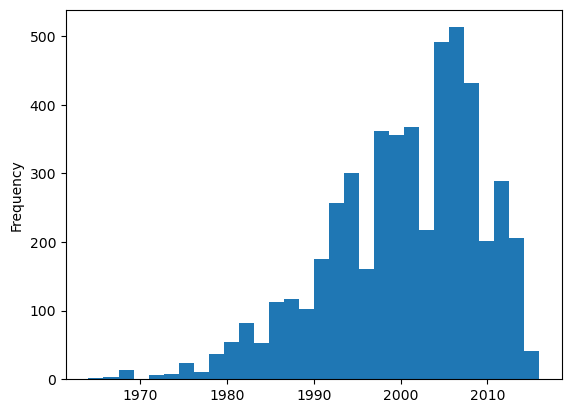

In [17]:
metal_f["formed"].plot(kind="hist",bins=30)

Si nota una crescita molto elevata di band nel rang di 1990 a 2010, un trend di band metal in quel range.

**CSV ELECTIONS**

In [18]:
#esaminiamo un po i metadati
elections = pd.read_csv("election.csv")
print(elections.dtypes)
elections.sample(5)

district       object
Coderre         int64
Bergeron        int64
Joly            int64
total           int64
winner         object
result         object
district_id     int64
dtype: object


,district,Coderre,Bergeron,Joly,total,winner,result,district_id
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
55,92-Joseph-Beaubien,540,833,592,1965,Bergeron,plurality,92
33,23-Centre,2526,851,1286,4663,Coderre,majority,23
56,93-Robert-Bourassa,446,465,419,1330,Bergeron,plurality,93


<Axes: >

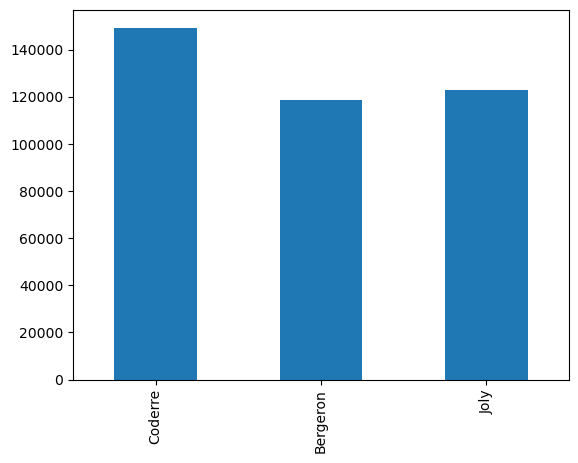

In [19]:
#Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)
elections.loc[:,"Coderre":"Joly"].sum().plot(kind="bar")

<Axes: ylabel='district'>

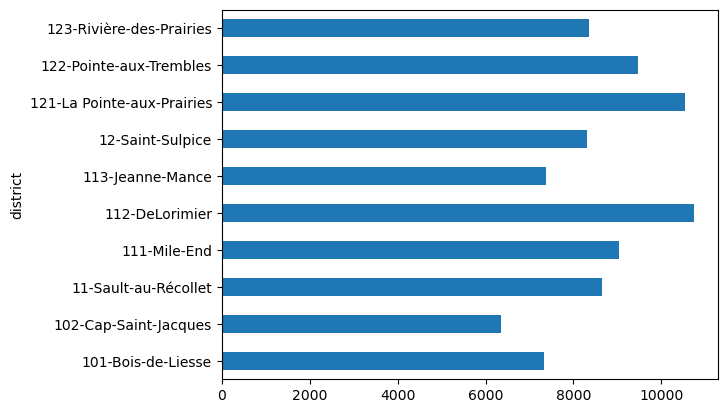

In [20]:
#Con un grafico a barre confrontiamo il numero di votanti per i primi dieci distretti
#elections = elections.set_index("district_id")
ele = elections.sort_index(ascending=True)
ele10 = ele.head(10)
ele10 = ele10.set_index("district")
ele10["total"].plot(kind="barh")

**DATASET PARTY NYC**

In [27]:
party = pd.read_csv("party_in_nyc.csv")
print(party.dtypes)
party.sample(5)

Created Date      object
Closed Date       object
Location Type     object
Incident Zip     float64
City              object
Borough           object
Latitude         float64
Longitude        float64
dtype: object


,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
215421,2016-12-11 01:17:29,2016-12-11 03:42:11,Residential Building/House,10452.0,BRONX,BRONX,40.837538,-73.924206
214292,2016-12-10 00:07:11,2016-12-10 01:51:57,Club/Bar/Restaurant,10028.0,NEW YORK,MANHATTAN,40.777575,-73.951054
169022,2016-09-18 22:29:26,2016-09-18 23:06:02,Residential Building/House,11357.0,WHITESTONE,QUEENS,40.776398,-73.817643
137427,2016-08-10 18:28:02,2016-08-11 15:37:18,Residential Building/House,11226.0,BROOKLYN,BROOKLYN,40.655203,-73.961022
157172,2016-09-04 23:56:18,2016-09-05 00:07:20,Street/Sidewalk,11225.0,BROOKLYN,BROOKLYN,40.667732,-73.957439


In [29]:
#party["Created Date"] = pd.to_datetime ("Created Date",errors = "coerce")
party["Created Date"].astype(str).str.strip()
party["Created Date"] = pd.to_datetime(
    party["Created Date"],
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)
party["Closed Date"] = pd.to_datetime(
    party["Closed Date"],
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)
party.dtypes

Created Date     datetime64[ns]
Closed Date      datetime64[ns]
Location Type            object
Incident Zip            float64
City                     object
Borough                  object
Latitude                float64
Longitude               float64
dtype: object

<Axes: ylabel='Location Type'>

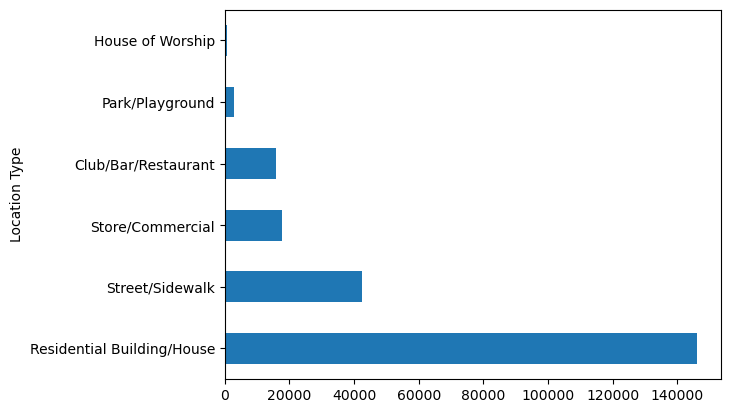

In [32]:
#Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale
party["Location Type"].value_counts().plot(kind="barh")

In [37]:
#Qual è il rettangolo di latitudine e longitudine considerato dal dataset?
print(party["Latitude"].agg(["max","min"]))
print(party["Longitude"].agg(["max","min"]))
party.describe()

max    40.912178
min    40.498820
Name: Latitude, dtype: float64
max   -73.702303
min   -74.251277
Name: Longitude, dtype: float64


,Created Date,Closed Date,Incident Zip,Latitude,Longitude
count,225414,224619,224424.000000,223946.000000,223946.000000
mean,2016-07-09 08:29:20.662230272,2016-07-09 00:01:50.590622208,10720.020992,40.749730,-73.924889
min,2015-12-31 00:01:15,1900-01-01 00:00:00,83.000000,40.498820,-74.251277
25%,2016-05-02 00:39:44.249999872,2016-05-02 13:51:35,10039.000000,40.684648,-73.958245
50%,2016-07-05 01:22:03.500000,2016-07-05 19:14:28,10469.000000,40.739170,-73.929713
75%,2016-09-18 22:48:45.750000128,2016-09-19 04:13:05.500000,11225.000000,40.829273,-73.893299
max,2016-12-31 23:58:52,2017-01-02 03:50:04,11697.000000,40.912178,-73.702303
std,NaN,NaN,576.827879,0.082068,0.063779


In [47]:
#Quante segnalazioni sono state fatte per case private?
print(party[party["Location Type"] == "Residential Building/House"]["Created Date"].count()," Casi per domicilio")
party["Location Type"].value_counts()

146040  Casi per domicilio


Location Type
Residential Building/House    146040
Street/Sidewalk                42353
Store/Commercial               17617
Club/Bar/Restaurant            15766
Park/Playground                 3036
House of Worship                 602
Name: count, dtype: int64

<Axes: xlabel='Borough', ylabel='count'>

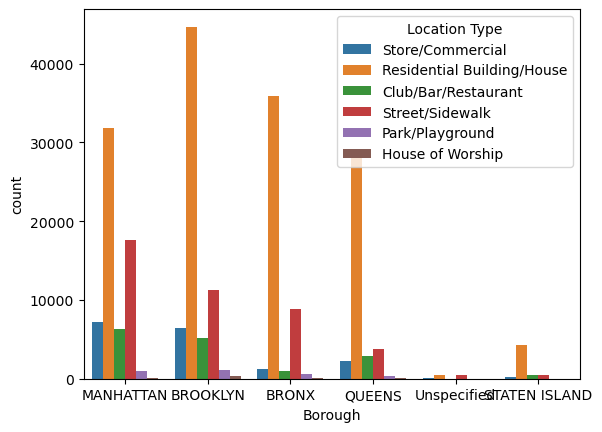

In [49]:
#Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere;
#che succede se aggiungiamo il parametro hue="Location Type"?
sns.countplot(data=party,x='Borough',hue="Location Type")

riusciamo a dividere per tipo di chiamata le colonne, utile per confronto